In [1]:
import tensorflow as tf
import numpy as np
import logging

In [2]:
#only to display errors
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
import numpy as np

In [4]:
celcius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
faranheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

`celcius to faranheit conversion`
\begin{align}
f = (^{o}c * 1.8) + 3.2
\end{align}


In [5]:
for i,c in enumerate(celcius):
    print("Degree Celcius = {}, Degree Faranheit = {}" .format(c, faranheit[i]))

Degree Celcius = -40.0, Degree Faranheit = -40.0
Degree Celcius = -10.0, Degree Faranheit = 14.0
Degree Celcius = 0.0, Degree Faranheit = 32.0
Degree Celcius = 8.0, Degree Faranheit = 46.0
Degree Celcius = 15.0, Degree Faranheit = 59.0
Degree Celcius = 22.0, Degree Faranheit = 72.0
Degree Celcius = 38.0, Degree Faranheit = 100.0


In [8]:
# Inputs - Features
# Output - Labels
#units=1 — This specifies the number of neurons in the layer.
#          The number of neurons defines how many internal variables the layer has 
#input_shape=[1] — This specifies that the input to this layer is a single value

l0 = tf.keras.layers.Dense(units=1, input_shape =[1])

In [9]:
# The Sequential model definition takes a list of layers as argument, 
#specifying the calculation order from the input to the output.
#This model has just a single layer, l0.

model = tf.keras.Sequential([l0])

In [13]:
#Before training, the model has to be compiled

#Loss function — A way of measuring how far off predictions are from the desired outcome.

#Optimizer function — A way of adjusting internal values in order to reduce the loss.

#0.1 is learning rate

model.compile(loss = 'mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

`This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.`

In [15]:
hostory = model.fit(celcius, faranheit, epochs=500, verbose=False)
print("Model id Trained")

Model id Trained


In [16]:
import matplotlib.pyplot as plt

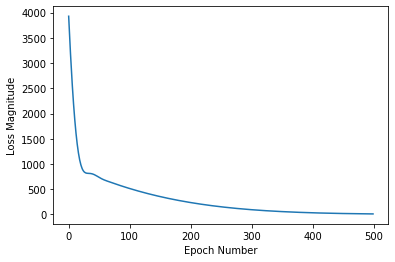

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(hostory.history['loss'])

In [19]:
print(model.predict([100]))

[[211.31287]]


`finding the parameters`


In [21]:
print("the parameters are {}" .format(l0.get_weights()))

the parameters are [array([[1.8239483]], dtype=float32), array([28.918043], dtype=float32)]


In [32]:
##################

"""
Now building a higher layer model.
Three layer model, with l0, l1, l2 layers, with 4, 4, 1 units ineach respectively
"""

##################

l0 = tf.keras.layers.Dense(units=4, input_shape = [1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])

model.compile(loss = tf.keras.losses.mean_squared_error, optimizer = tf.keras.optimizers.Adam(0.1))

model.fit(celcius, faranheit, epochs = 500, verbose=False)
print("Finished training the data")

Finished training the data


In [33]:
print(model.predict([100]))

[[211.74742]]


In [42]:
W1, b1 = l0.get_weights()

In [45]:
print("W1: {}\nW1_shape: {}\nb1: {}\nb1_shape: {}".format(W1, W1.shape, b1, b1.shape))

W1: [[-0.80252486 -0.5901844   0.34726176  0.0705794 ]]
W1_shape: (1, 4)
b1: [-3.291115  -3.29332   -2.847628   3.2015586]
b1_shape: (4,)


In [41]:
print("These are the l0 variables: {} ".format(l0.get_weights()))

These are the l0 variables: [array([[-0.80252486, -0.5901844 ,  0.34726176,  0.0705794 ]],
      dtype=float32), array([-3.291115 , -3.29332  , -2.847628 ,  3.2015586], dtype=float32)] 


In [46]:
print("These are the l1 variables:")
W2, b2 = l1.get_weights()
print("W2: {}\nW2_shape: {}\nb2: {}\nb2_shape: {}".format(W2, W2.shape, b2, b2.shape))

These are the l1 variables:
W2: [[ 0.65898544 -0.29775247 -0.21560147 -0.62856585]
 [ 0.8319671   0.7227906   0.7411325  -0.20976113]
 [ 0.30004337  0.36309424  0.43190724 -0.67082816]
 [-0.39119828  0.1126104  -0.38800758  0.882808  ]]
W2_shape: (4, 4)
b2: [-3.249291  -2.5334995  0.1039298  3.187031 ]
b2_shape: (4,)


In [48]:
print("These are the l2 variables: ")
W3, b3 = l2.get_weights()
print("W3: {}\nW3_shape: {}\nb3: {}\nb3_shape: {}".format(W3, W3.shape, b3, b3.shape))

These are the l2 variables: 
W3: [[-1.2076181 ]
 [-0.25576502]
 [-0.08779676]
 [ 1.3826039 ]]
W3_shape: (4, 1)
b3: [3.2475812]
b3_shape: (1,)
